<a href="https://colab.research.google.com/github/prathamsss/Airport-Security/blob/master/FINAL_BIRD_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input

import cv2
import os
import random
import collections
from collections import defaultdict

from shutil import copy
from shutil import copytree, rmtree

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow as tf


In [ ]:
n_classes = 50             # Setting Parameters 

epochs = 15

nb_train_samples =  1500
nb_validation_samples = 1389



In [ ]:
# Traning only for 50 classes 

'''. Folders spilted as :-    First 50 ----> 1. Train.  ---> class 1
                                                        ---> Class 2
                                                        .....class 50
                                       ----> 2. Test.   ---> class 1
                                                        ---> Class 2
                                                        .....class 50 '''
                                    


img_width, img_height = 299, 299


train_data_dir = '/content/drive/My Drive/ML codes/Bird Detection/Dataset/CUB_200_2011/f_50/train'
validation_data_dir = '/content/drive/My Drive/ML codes/Bird Detection/Dataset/CUB_200_2011/f_50/test'
batch_size = 16


                    # Form keras using imgdatagenrator for managing data


datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
       rescale=1./255)
     

train_generator = datagen.flow_from_directory(train_data_dir,
                                              target_size=(img_height, img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')

validation_generator = datagen.flow_from_directory(
                                                  validation_data_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 1500 images belonging to 50 classes.
Found 1389 images belonging to 50 classes.


In [ ]:
# Constucting MODEL

model_nm = 'DenseNet169'+'__'            ##   Enter model nm 
path='/content/drive/My Drive/ML/Bird_classification_model_2/'

bestmodel_path = path+'bestmodel_'+model_nm+str(n_classes)+'class.hdf5'
trainedmodel_path = path+'trainedmodel_'+model_nm+str(n_classes)+'class.hdf5'
history_path = path+'history_'+model_nm+str(n_classes)+'.log'

import tensorflow as tf

inception = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False)

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)
                                                                                                                  #.  Compiling model.
model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


checkpoint = ModelCheckpoint(filepath=bestmodel_path, verbose=1, save_best_only=True)
csv_logger = CSVLogger(history_path)

#class_map = train_generator.class_indices


In [ ]:
#.  Fitting model
history = model.fit_generator(train_generator,
                              steps_per_epoch = nb_train_samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = nb_validation_samples // batch_size,
                              epochs=epochs,
                              verbose=1)

Epoch 1/15
93/93 [==============================] - 72s 774ms/step - loss: 4.0154 - accuracy: 0.0984 - val_loss: 4.7434 - val_accuracy: 0.0254
Epoch 2/15
93/93 [==============================] - 70s 753ms/step - loss: 2.6453 - accuracy: 0.4609 - val_loss: 5.4720 - val_accuracy: 0.0254
Epoch 3/15
93/93 [==============================] - 70s 749ms/step - loss: 1.7112 - accuracy: 0.6867 - val_loss: 4.7108 - val_accuracy: 0.0218
Epoch 4/15
93/93 [==============================] - 70s 749ms/step - loss: 1.2679 - accuracy: 0.7655 - val_loss: 4.4692 - val_accuracy: 0.0356
Epoch 5/15
93/93 [==============================] - 69s 745ms/step - loss: 1.0101 - accuracy: 0.8518 - val_loss: 4.1817 - val_accuracy: 0.0640
Epoch 6/15
93/93 [==============================] - 69s 746ms/step - loss: 0.8287 - accuracy: 0.8875 - val_loss: 3.8978 - val_accuracy: 0.1250
Epoch 7/15
93/93 [==============================] - 70s 751ms/step - loss: 0.7125 - accuracy: 0.9252 - val_loss: 2.9273 - val_accuracy: 0.3198

In [ ]:
# Saving model'''

model.save('/content/drive/My Drive/ML/Bird_classification_model/'+model_nm+str(n_classes)+'_class.hdf5')
class_map = train_generator.class_indices

In [ ]:
# Loading Model
import tensorflow as tf
ms=tf.keras.models.load_model(
    '/content/drive/My Drive/ML/Bird_classification_model/bestmodel_DenseNet169__200class.hdf5', compile=True)

In [ ]:
# Evaluation model

p=model.evaluate_generator(generator=validation_generator)
path='/content/drive/My Drive/ML/'

with open(path+'All_Performance.txt','a') as f:
  f.write('\n')
  f.write(str(model_nm+"-->"+str(p))+'  No Of Epoch = '+str(epochs)+'   No Of Classes = '+str(n_classes))

Instructions for updating:
Please use Model.evaluate, which supports generators.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted class  =  003.Sooty_Albatross


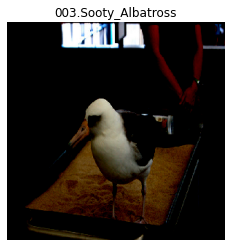

In [ ]:
# Predicting Samples


def predict_class(model, images, show = True):
    img = image.load_img(images, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img = preprocess_input(img)                                      

    pred = model.predict(img)
    
    index = np.argmax(pred)
    l=list(validation_generator.class_indices)   
    pred_value = l[index]
    #print(pred)
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        print("Predicted class  = ",pred_value)
        plt.title(pred_value)
        plt.show()

# Give path of image to predict
path_2='/content/drive/My Drive/ML codes/Bird Detection/Dataset/CUB_200_2011/My_data/train/002.Laysan_Albatross/Laysan_Albatross_0083_756.jpg'
  
predict_class(model,path_2,show = True)

In [ ]:
# Confusion matrix
from sklearn import metrics
import numpy as np
predictions = model.predict_generator(validation_generator)


Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
print(len(predicted_classes))

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   

print(len(class_labels))
print(len(true_classes))
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
#print(report)    
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
confusion_matrix



1389
50
1389


array([[2, 1, 0, ..., 2, 2, 1],
       [2, 0, 2, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 1]])

In [ ]:
confusion_matrix.diagonal()

array([2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 0, 1])

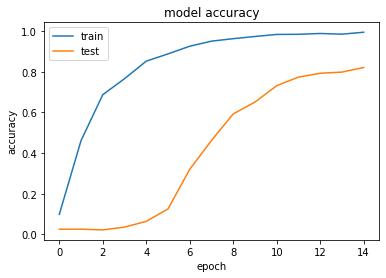

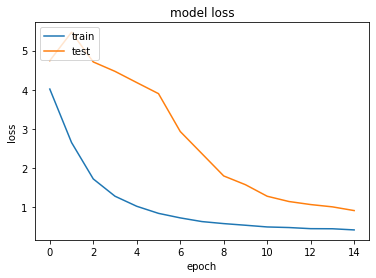

In [ ]:
# Analysing model


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()